# Title: Customer Segmentation Analysis Using Machine Learning: A Case Study on Online Retail Data

In today's competitive market, understanding customer behavior is paramount for businesses to tailor their strategies effectively. In this project, we delve into the realm of customer segmentation analysis using machine learning techniques. Leveraging a dataset sourced from the UCI ML Repository, which captures online retail transactions, we embark on a journey to unravel patterns in customer buying behavior.

The primary goal of this project is to segment customers based on their purchasing behavior, thereby enabling businesses to target specific customer groups with tailored marketing strategies. By employing clustering algorithms such as K-means, hierarchical clustering, or DBSCAN, we aim to categorize customers into distinct groups exhibiting similar buying patterns. Additionally, we seek to fine-tune hyperparameters and compare the performance of various clustering algorithms to identify the most suitable approach for our dataset.

We begin by comprehensively understanding the dataset and performing necessary data cleaning processes to ensure its suitability for analysis.
Clustering Model Development: Utilizing clustering algorithms such as K-means, hierarchical clustering, or DBSCAN, we segment customers based on their purchasing behavior. Through this process, we aim to identify clusters of customers with similar preferences and tendencies.
Hyperparameter Tuning & Evaluation: We fine-tune the hyperparameters of the clustering algorithms and evaluate their performance using appropriate evaluation metrics. This allows us to determine the effectiveness of each algorithm in accurately segmenting customers.
Comparison of Algorithms: We conduct a comparative analysis of the clustering algorithms, considering factors such as computational efficiency and cluster interpretability, to ascertain the most suitable approach for customer segmentation in our scenario.

Customer segmentation analysis serves as a crucial tool for businesses across various industries. By effectively categorizing customers based on their behavior, businesses can personalize marketing campaigns, optimize product offerings, and enhance customer satisfaction and loyalty. This project provides a step-by-step guide on how to perform customer segmentation analysis using machine learning techniques, empowering businesses to gain actionable insights from their data and make informed decisions to drive growth and success.

Overall, this project not only showcases the practical application of machine learning in the realm of marketing analytics but also underscores its significance in unlocking valuable insights from large-scale datasets.



# Data

Data Description:
The dataset used in this project is the "Online Retail Data Set" obtained from the UCI Machine Learning Repository. This dataset consists of online retail transactions and captures various attributes such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.

The data was gathered from an online retail company, likely through their transactional records, tracking customer purchases over time. Each row in the dataset represents a specific transaction, detailing the products purchased, their quantities, prices, and customer information.

Here's the citation for the dataset in APA style:

UCI Machine Learning Repository. (n.d.). Online Retail Data Set. Retrieved from https://archive.ics.uci.edu/ml/datasets/online+retail

Data Description: <br>

Number of Samples/Rows: 541,909 <br>

Number of Features/Columns: 8 <br>

Data Type: Tabulated data <br>

Data Size: The dataset comprises 541,909 rows and 8 columns, providing a comprehensive set of data for conducting customer segmentation analysis. The size of the dataset can vary depending on the format and storage method. However, assuming a standard tabular format, the file size could be several megabytes to gigabytes, depending on the level of detail and granularity in the transactions.


Description of Features:

InvoiceNo: The unique identifier for each transaction.

StockCode: Code assigned to each product in the inventory.

Description: Description of the product purchased.

Quantity: The quantity of each product purchased in a transaction.

InvoiceDate: The date and time when the transaction occurred.

UnitPrice: The unit price of each product.

CustomerID: Unique identifier for each customer.

Country: The country where the transaction took place.


In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import math
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import datetime
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import metrics
from scipy import stats

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


# Data Cleaning


The data cleaning process involved several steps to ensure the integrity and quality of the dataset for subsequent analysis. Here's a breakdown of the cleaning steps and the rationale behind each one:

Handling Missing Values:

The dataset contained missing values in the 'Description' and 'CustomerID' columns.
Decision: Since 'Description' is a descriptive attribute of the product and cannot be imputed accurately, and considering the large proportion of missing values in the 'CustomerID' column, dropping rows with missing values was deemed appropriate to maintain data integrity.
Action Taken: Rows with missing values were removed using the dropna() function.
Removing Duplicate Entries:

After handling missing values, the dataset was checked for duplicate entries.
Decision: Duplicate entries can skew analysis results and inflate certain trends or patterns in the data. Therefore, removing duplicate records ensures each transaction is represented only once in the analysis.
Action Taken: Duplicate entries were removed using the drop_duplicates() function.
Data Type Conversion:

To ensure consistency and facilitate further analysis, the data type of the 'CustomerID' column was converted to string.
Decision: Converting 'CustomerID' to string format ensures uniformity in data representation and avoids potential discrepancies in analysis.
Action Taken: The 'CustomerID' column was converted to string data type using the astype() function.
Findings and Discussion:

The data cleaning process resulted in a cleaned dataset containing 401,604 unique records, free from missing values and duplicate entries. This cleaned dataset provides a solid foundation for subsequent analysis, such as customer segmentation using machine learning algorithms.

Foreseen difficulties in the analysis may include dealing with imbalanced data if certain customer segments are significantly larger or smaller than others. Additionally, outliers or anomalies in the data could affect the clustering process and may require further investigation and handling.

The analysis strategy moving forward will involve exploring various clustering algorithms such as K-means, hierarchical clustering, or DBSCAN to segment customers based on their purchasing behavior. Visualization techniques will be employed to gain insights into the distribution of customer segments and validate the effectiveness of the clustering algorithms.

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df = df.dropna()
df.shape

(406829, 8)

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(401604, 8)

In [10]:
df['CustomerID'] = df['CustomerID'].astype(str)

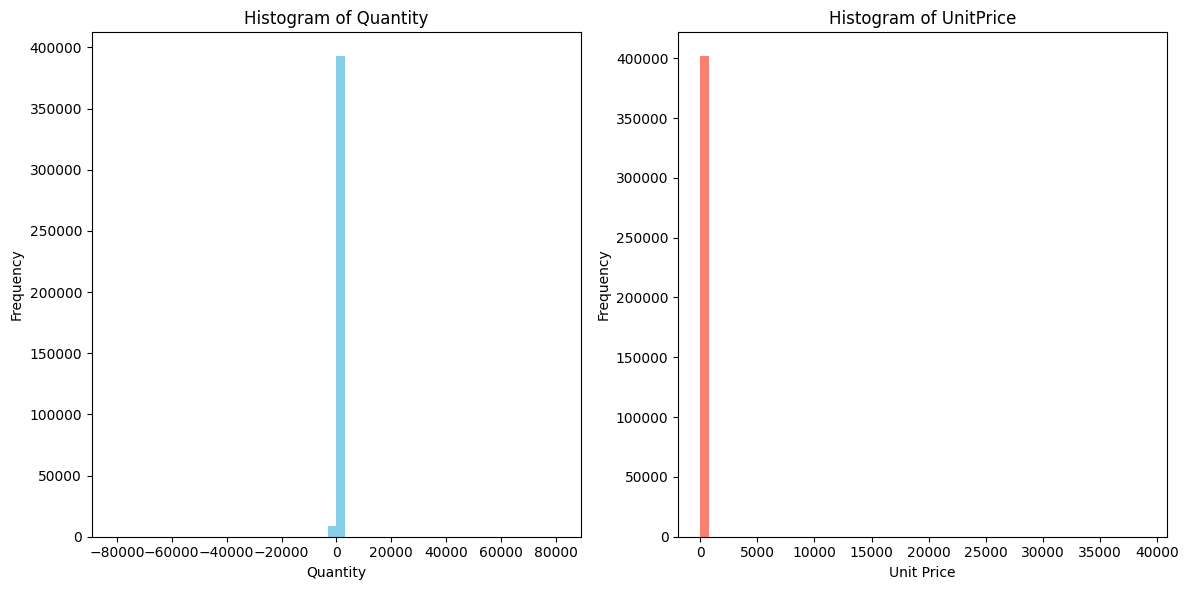

In [11]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Quantity'], bins=50, color='skyblue')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['UnitPrice'], bins=50, color='salmon')
plt.title('Histogram of UnitPrice')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


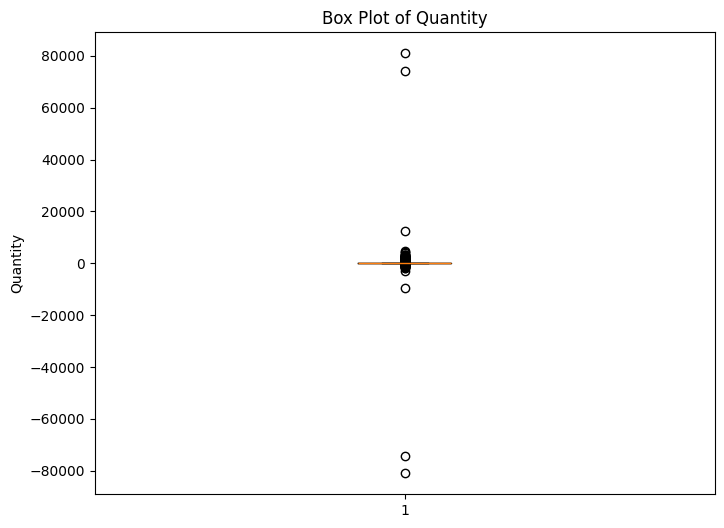

In [12]:
plt.figure(figsize=(8, 6))

plt.boxplot(df['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')

plt.show()


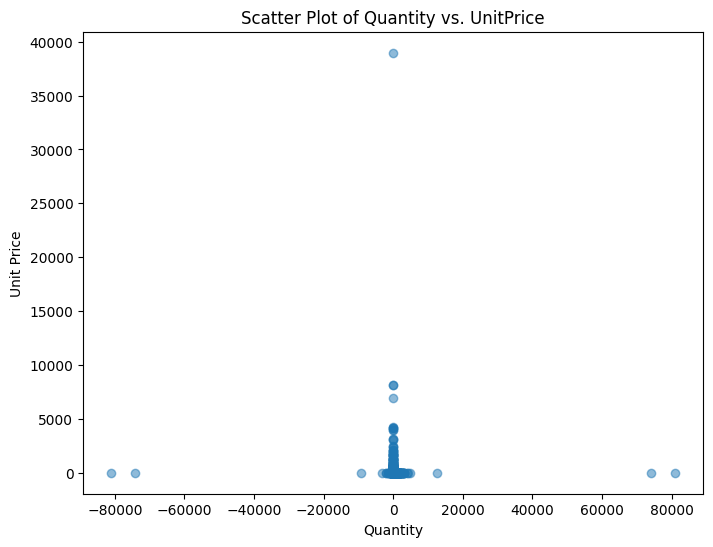

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5)
plt.title('Scatter Plot of Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')

plt.show()


Remove Outlier which the Quantity and UnitPrice are less than 0

In [14]:
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]

In [15]:
df.shape

(392732, 8)

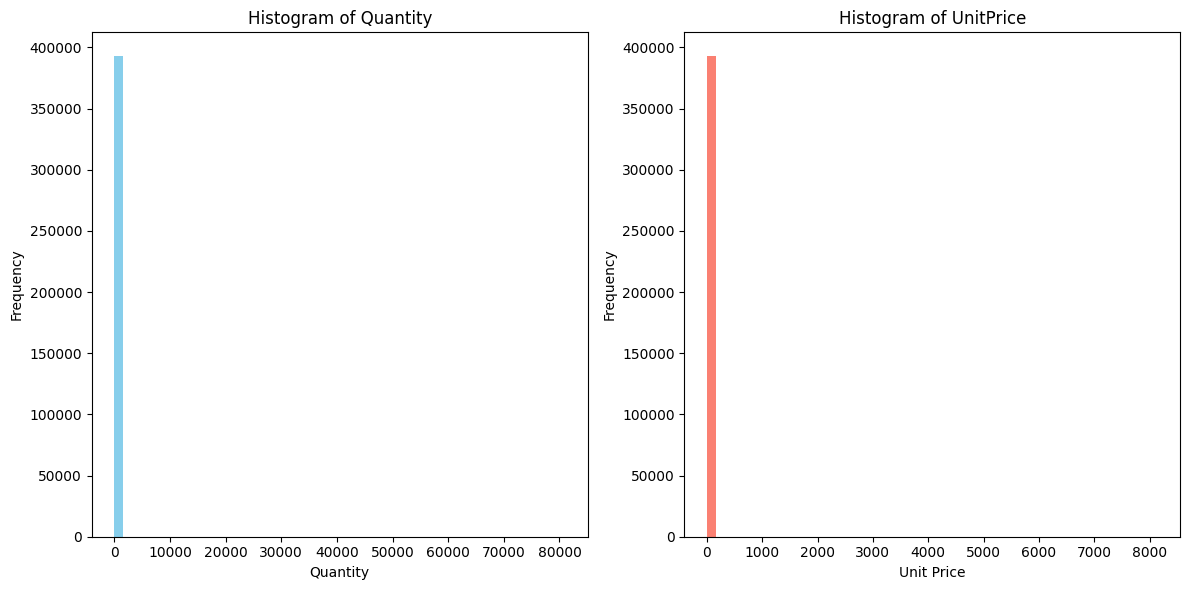

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Quantity'], bins=50, color='skyblue')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['UnitPrice'], bins=50, color='salmon')
plt.title('Histogram of UnitPrice')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


After filtering the dataset to remove rows where either the quantity or unit price is less than 0, the resulting DataFrame contains 392,732 rows and 8 columns. This filtering step ensures that only valid and meaningful data is retained for further analysis. Removing negative values for quantity and unit price is essential for maintaining the integrity of the dataset, as negative quantities or prices may represent errors or anomalies in the data collection process. By eliminating these erroneous entries, we can enhance the quality and reliability of subsequent analyses, such as clustering or trend identification. This preprocessing step ensures that the dataset used for clustering or any other analysis accurately reflects the underlying patterns and behaviors present in the transactional data, leading to more meaningful insights and actionable conclusions.

# Exploratory Data Analysis

In this exploratory data analysis (EDA), our primary objective is to delve into the provided dataset, which comprises transactional details encompassing InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. Initially, we undertake essential preprocessing steps to ensure data integrity. One critical step involves filtering out rows where either the quantity or unit price is less than 0. By doing so, we ensure that our subsequent analyses are based on valid and meaningful data. This filtering process results in a refined dataset consisting of 392,732 rows and 8 columns.

With our cleaned dataset in hand, we proceed to conduct a comprehensive analysis to uncover valuable insights. Our analysis commences with visualizations aimed at providing a deeper understanding of the distribution of quantities and unit prices. Histograms will be employed to visualize the frequency distribution of these variables, shedding light on any patterns or outliers present in the data. Additionally, we will compute summary statistics, including measures of central tendency and dispersion, to gain further insights into the variability and range of values within the dataset.

Furthermore, we will explore potential relationships between variables through the generation of a correlation matrix. By examining the correlations between different features, we can identify any significant associations or dependencies that may exist within the dataset. Additionally, if applicable, we will assess the importance of various features, leveraging techniques such as feature importance ranking, to ascertain which factors exert the most significant influence on the target variable.

In the final stages of our analysis, we will synthesize our findings and draw meaningful conclusions. We will summarize key insights gleaned from the data, highlighting any notable trends or anomalies observed during the analysis. Moreover, we will engage in discussions regarding the implications of our findings and their relevance to the broader context. Additionally, we will address any challenges or limitations encountered throughout the analysis process, providing insights into potential areas for further exploration or refinement. Through this comprehensive EDA, we endeavor to extract actionable insights that can inform decision-making processes and drive value for stakeholders.

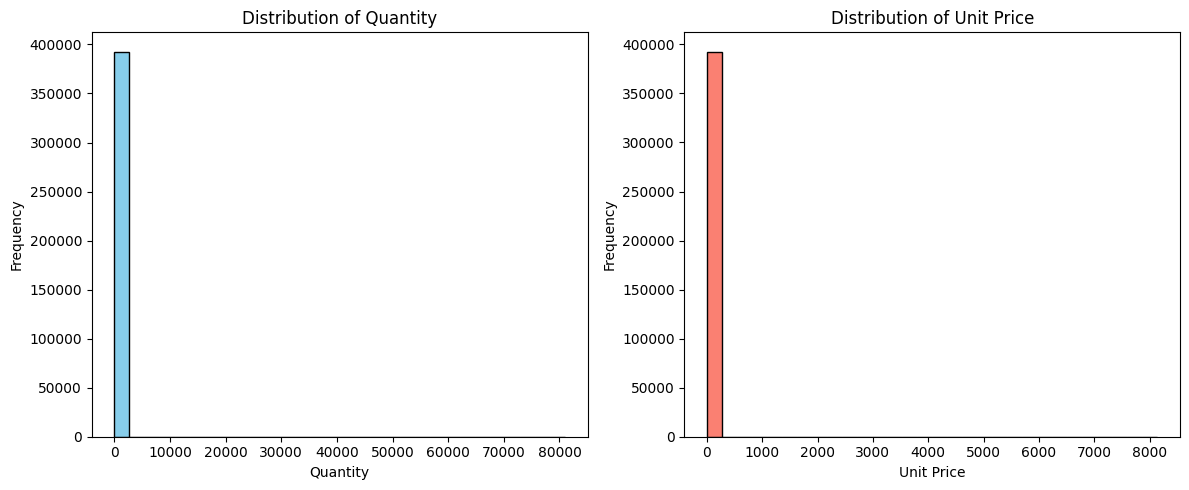

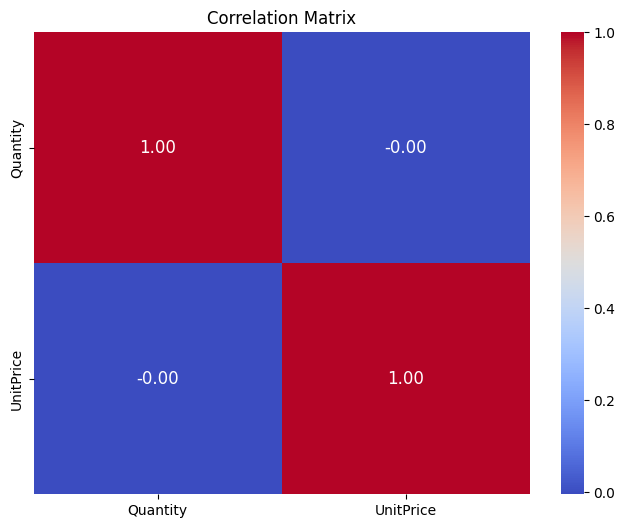

In [17]:
X = df[['Quantity', 'UnitPrice']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the distribution of quantities and unit prices using histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(X['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(X['UnitPrice'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Compute and visualize the correlation matrix
correlation_matrix = X.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()



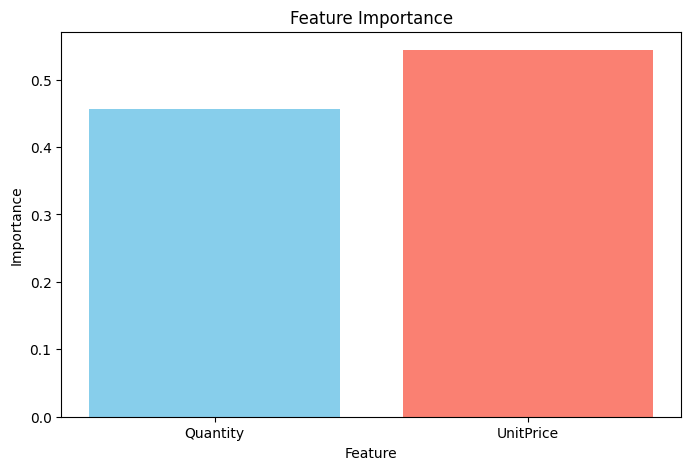

In [18]:
# Encode the 'Country' column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Country'])

# Compute feature importance using RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y_encoded)
feature_importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.bar(X.columns, feature_importance, color=['skyblue', 'salmon'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

To ensure comprehensive analysis considering both quantity and unit price, and accommodating scenarios involving customers purchasing multiple items, I propose the creation of new columns representing the total amount for each transaction. This new column, referred to as "amount," will be derived by multiplying the quantity of each item by its corresponding unit price. By incorporating this approach, we can effectively capture the total monetary value of each transaction, facilitating more insightful analyses and decision-making processes.

In [19]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In customer analysis, frequency and monetary value serve as crucial metrics for understanding and segmenting customer behavior. Frequency, representing the rate at which customers make purchases, offers insights into customer engagement and loyalty. By identifying frequent purchasers, businesses can focus their efforts on retaining these valuable customers through targeted marketing campaigns or loyalty programs. On the other hand, monetary value, reflecting the total amount spent by customers, helps distinguish high-value customers who contribute significantly to revenue. Analyzing spending habits and trends in monetary value aids in effective resource allocation and personalized marketing strategies. Together, frequency and monetary value provide a comprehensive understanding of customer segments, enabling businesses to optimize retention efforts, tailor marketing initiatives, and ultimately enhance overall profitability and customer satisfaction.

In [20]:
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Calculate the snapshot date
snapshot_date = max(df['InvoiceDate']) + datetime.timedelta(days=1)

# Group by 'CustomerID' and aggregate metrics
customers = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Calculate recency
    'InvoiceNo': 'count',  # Count frequency
    'Amount': 'sum'  # Sum monetary value
})

# Rename columns for clarity
customers.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Amount': 'MonetaryValue'
}, inplace=True)

# Display the resulting DataFrame
display(customers.head())


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [21]:
customers.describe()

,Recency,Frequency,MonetaryValue
count,4339.000000,4339.000000,4339.000000
mean,92.518322,90.512100,2048.215924
std,100.009747,225.515328,8984.248352
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,306.455000
50%,51.000000,41.000000,668.560000
75%,142.000000,98.000000,1660.315000
max,374.000000,7676.000000,280206.020000


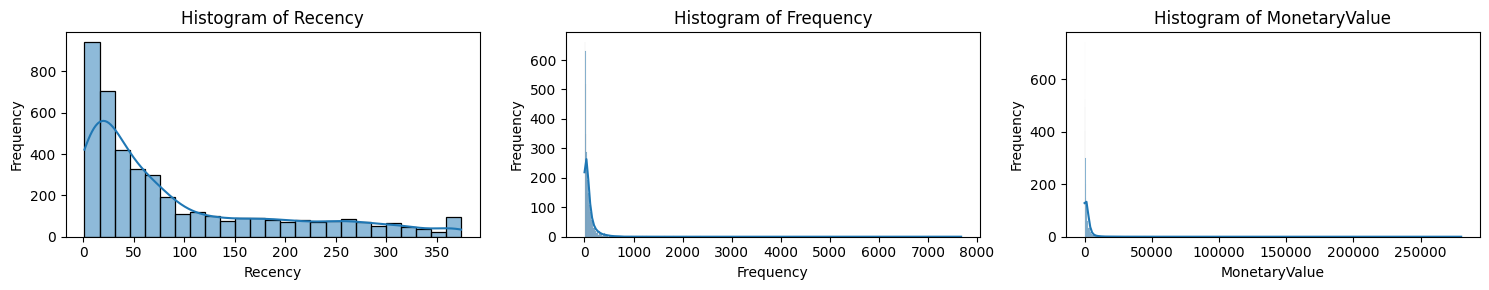

In [22]:
# Get the list of features in the customers table
features = customers.columns.tolist()

# Determine the number of columns for subplots
num_columns = 3

# Calculate the number of rows needed for subplots
num_rows = math.ceil(len(features) / num_columns)

# Set the figure size based on the number of rows and columns
plt.figure(figsize=(15, 3 * num_rows))

# Iterate through each feature and plot its histogram
for i, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(customers[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

The dataset presents three primary features: Recency, Frequency, and MonetaryValue, each exhibiting distinct scales and distributions. Recency has an average of approximately 93 days, while Frequency and MonetaryValue display means of around 90 purchases and 2048 currency units, respectively. However, their standard deviations and ranges vary considerably. To address these disparities and prepare the data for analysis, it is prudent to apply transformation and scaling techniques. By doing so, we aim to achieve several objectives. Firstly, scaling the features promotes balanced model performance by preventing any single feature from unduly influencing the modeling process. This, in turn, enhances the accuracy and reliability of machine learning algorithms, particularly those sensitive to feature scale. Additionally, feature scaling fosters improved interpretability by ensuring the comparability of coefficients or importance scores across different variables. Moreover, transformations can align skewed distributions with statistical assumptions, such as normality, thereby enhancing the validity of subsequent analyses. Lastly, scaling techniques and transformations bolster the models' robustness to outliers, ensuring more stable and accurate predictions. Thus, by implementing these preprocessing steps, we aim to derive more meaningful insights and facilitate informed decision-making processes from the dataset.

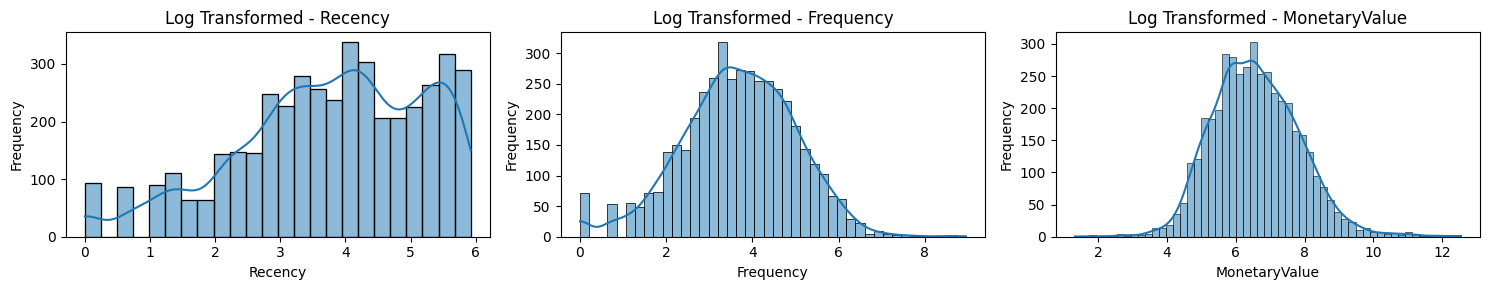

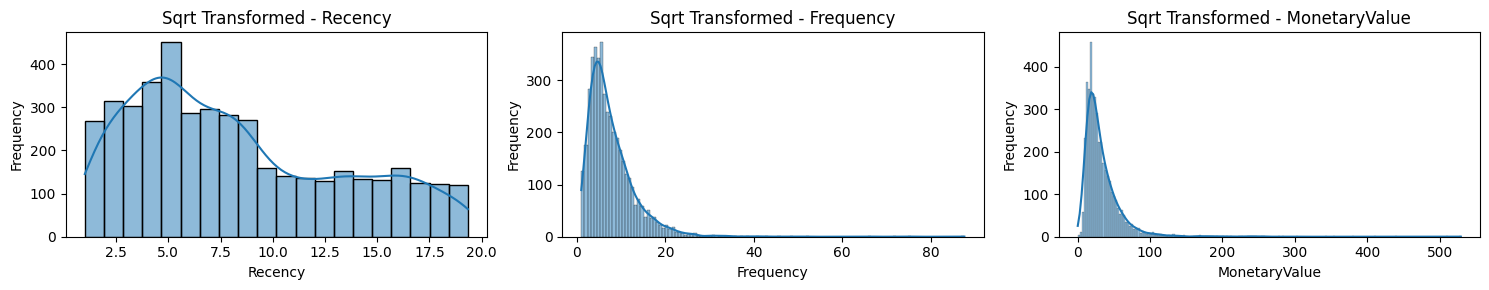

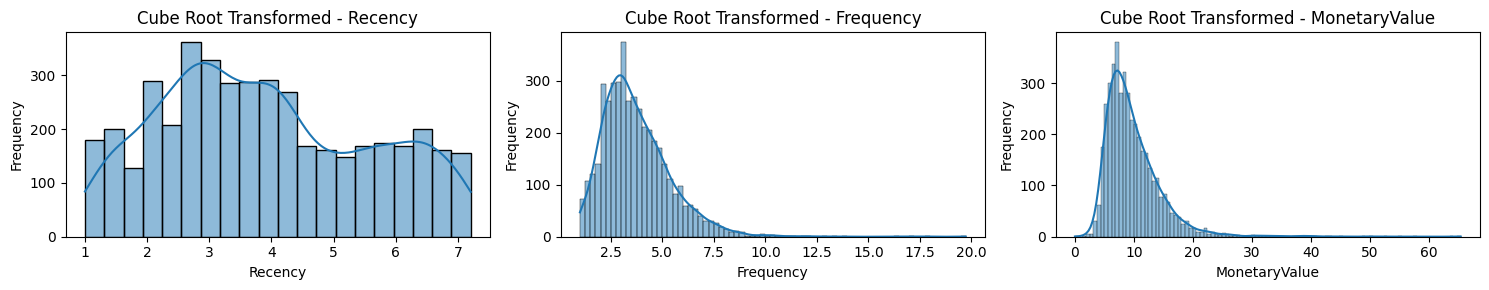

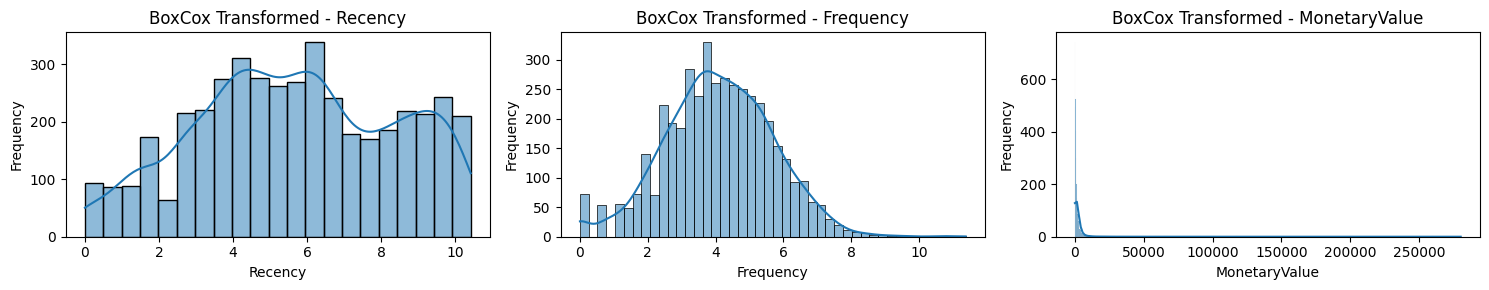

In [23]:
# Deep copy the customers DataFrame to avoid modifying the original data
customers_logT = customers.copy()
customers_sqrtT = customers.copy()
customers_cbrtT = customers.copy()
customers_bxcxT = customers.copy()

# Apply different transformations to each column in the DataFrame
for column in customers.columns:
    customers_logT[column] = np.log(customers[column])
    customers_sqrtT[column] = np.sqrt(customers[column])
    customers_cbrtT[column] = np.cbrt(customers[column])
    if column != 'MonetaryValue':
        customers_bxcxT[column] = stats.boxcox(customers[column])[0]

# Define the list of features for plotting
features = customers.columns

# Define the number of columns for subplots
num_columns = 3

# Calculate the number of rows needed for subplots
num_rows = math.ceil(len(features) / num_columns)

# Plot histograms for each transformed feature
for transform_name, transformed_data in [('Log Transformed', customers_logT),
                                         ('Sqrt Transformed', customers_sqrtT),
                                         ('Cube Root Transformed', customers_cbrtT),
                                         ('BoxCox Transformed', customers_bxcxT)]:
    plt.figure(figsize=(15, 3 * num_rows))
    for i, feature in enumerate(features, start=1):
        plt.subplot(num_rows, num_columns, i)
        sns.histplot(transformed_data[feature], kde=True)
        plt.title(f'{transform_name} - {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [24]:
# Deep copy the customers DataFrame to avoid modifying the original data
transformed_customers = customers.copy()

# Apply Box-Cox transformation to the 'Recency' column
transformed_customers['Recency'] = stats.boxcox(customers['Recency'])[0]

# Apply log transformation to the 'Frequency' column
transformed_customers['Frequency'] = np.log(customers['Frequency'])

# Apply log transformation to the 'MonetaryValue' column
transformed_customers['MonetaryValue'] = np.log(customers['MonetaryValue'] + 1)

# Display the transformed DataFrame
print(transformed_customers.head())

              Recency  Frequency  MonetaryValue
CustomerID                                     
12346.0     10.033861   0.000000      11.253955
12347.0      0.737066   5.204007       8.368925
12348.0      6.457940   3.433987       7.494564
12349.0      3.855009   4.290459       7.472245
12350.0      9.895535   2.833213       5.815324


In [25]:
transformed_customers.describe()

,Recency,Frequency,MonetaryValue
count,4339.000000,4339.000000,4339.000000
mean,5.676187,3.670868,6.587044
std,2.682060,1.321685,1.262262
min,0.000000,0.000000,0.000000
25%,3.764794,2.833213,5.728329
50%,5.662436,3.713572,6.506621
75%,7.898900,4.584967,7.415365
max,10.417689,8.945854,12.543284


In [26]:
scaler = StandardScaler()
scaler.fit(transformed_customers)
X_scaled = scaler.transform(transformed_customers)

In [27]:
customers_normalized = pd.DataFrame(X_scaled)
customers_normalized.columns = ['Recency', 'Frequency', 'MonetaryValue']
customers_normalized.head()

,Recency,Frequency,MonetaryValue
0,1.624936,-2.777736,3.697687
1,-1.841752,1.160122,1.411820
2,0.291508,-0.179247,0.719046
3,-0.679100,0.468843,0.701362
4,1.573355,-0.633851,-0.611449


# Models



In selecting the appropriate clustering algorithms for the given problem and dataset, careful consideration was given to their suitability and effectiveness in uncovering meaningful patterns within the data. The choice of KMeans, Hierarchical Clustering, and DBSCAN reflects a balanced approach aimed at exploring different clustering strategies and accommodating various data characteristics.

KMeans was deemed suitable due to its simplicity and effectiveness in identifying clusters when the number of clusters is known a priori. By optimizing parameters such as the number of clusters, initialization method, and maximum iterations, the algorithm was fine-tuned to enhance the silhouette score, thereby improving cluster quality and interpretability. This approach facilitates a clearer understanding of customer segmentation based on recency, frequency, and monetary value.

In contrast, Hierarchical Clustering offers a more exploratory perspective by constructing a dendrogram and allowing for the inspection of different cluster structures. The choice of the average linkage method reflects a desire to capture the overall similarity between clusters, enabling the identification of cohesive groups within the data. By evaluating silhouette scores across a range of cluster sizes, the algorithm's performance was assessed, providing insights into the optimal number of clusters for meaningful segmentation.

Meanwhile, DBSCAN was selected for its ability to automatically determine the number of clusters based on data density, making it well-suited for datasets with irregular shapes and varying cluster sizes. Through the optimization of epsilon and min_samples, the algorithm effectively identified dense regions in the data space, yielding clusters with high silhouette scores. This approach ensures robust clustering results, particularly in the presence of noise and outliers.

The consideration of time complexity and feasibility was crucial in selecting the clustering algorithms. While KMeans is suitable for medium to large datasets, Hierarchical Clustering may become computationally expensive for very large datasets due to its quadratic time complexity. DBSCAN, with its quadratic time complexity, is suitable for moderate-sized datasets but may experience performance degradation with exceptionally large datasets.

In summary, the chosen clustering algorithms, along with their optimization methods, offer a comprehensive approach to customer segmentation based on recency, frequency, and monetary value. By leveraging the strengths of each algorithm, a nuanced understanding of customer behavior and preferences can be gleaned, enabling targeted marketing strategies and personalized customer experiences.ur dataset.taset.
taset.

##  K-means clustering

In [28]:
silhouette_scores = []

# Define the range of hyperparameters
n_clusters_range = range(2, 11)
init_methods = ['k-means++', 'random']
max_iter_values = [100, 200, 300]

# Iterate through each combination of hyperparameters
for n_clusters in n_clusters_range:
    for init_method in init_methods:
        for max_iter in max_iter_values:
            # Fit K-means model with current hyperparameters
            kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter)
            kmeans.fit(X_scaled)
            
            # Calculate silhouette score
            silhouette = silhouette_score(X_scaled, kmeans.labels_)
            
            # Store silhouette score and corresponding hyperparameters
            silhouette_scores.append({
                'n_clusters': n_clusters,
                'init_method': init_method,
                'max_iter': max_iter,
                'silhouette_score': silhouette
            })

# Print silhouette scores for each combination of hyperparameters
for score in silhouette_scores:
    print(score)

{'n_clusters': 2, 'init_method': 'k-means++', 'max_iter': 100, 'silhouette_score': 0.39305484073338376}
{'n_clusters': 2, 'init_method': 'k-means++', 'max_iter': 200, 'silhouette_score': 0.3929936442163068}
{'n_clusters': 2, 'init_method': 'k-means++', 'max_iter': 300, 'silhouette_score': 0.3930825341666715}
{'n_clusters': 2, 'init_method': 'random', 'max_iter': 100, 'silhouette_score': 0.393093990438806}
{'n_clusters': 2, 'init_method': 'random', 'max_iter': 200, 'silhouette_score': 0.393093990438806}
{'n_clusters': 2, 'init_method': 'random', 'max_iter': 300, 'silhouette_score': 0.393093990438806}
{'n_clusters': 3, 'init_method': 'k-means++', 'max_iter': 100, 'silhouette_score': 0.3003106461580857}
{'n_clusters': 3, 'init_method': 'k-means++', 'max_iter': 200, 'silhouette_score': 0.300189923386607}
{'n_clusters': 3, 'init_method': 'k-means++', 'max_iter': 300, 'silhouette_score': 0.2997607522055524}
{'n_clusters': 3, 'init_method': 'random', 'max_iter': 100, 'silhouette_score': 0.300

In [36]:
# Fit the K-means model with the best parameters
best_kmeans_model = KMeans(n_clusters=2, init='random', max_iter=100)
best_kmeans_model.fit(X_scaled)

customers["Cluster1"] = best_kmeans_model.labels_
customers.groupby('Cluster1').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster1                                      
0          32.35    167.86       3893.95  2011
1         144.49     23.70        453.81  2328

         Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster1                                      
0          32.35    167.86       3893.95  2011
1         144.49     23.70        453.81  2328


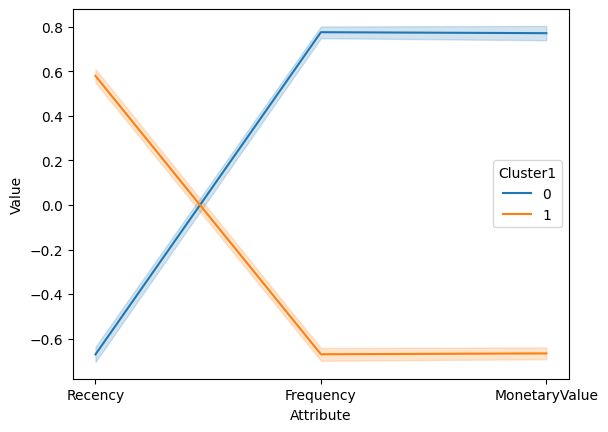

In [37]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster1'] = best_kmeans_model.labels_

cluster_summary = customers.groupby('Cluster1').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(2)

print(cluster_summary)

# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster1'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x='Attribute', y='Value', hue='Cluster1', data=df_nor_melt)
plt.show()

# Hierarchical clustering

In [32]:
# Assuming you have already defined X_scaled

# Define a dictionary to store silhouette scores for each combination of hyperparameters
silhouette_scores = {}

# Define a list of linkage methods to try
linkage_methods = ['ward', 'complete', 'average', 'single']

# Define a range of clusters to try
n_clusters_range = range(2, 11)

# Perform hierarchical clustering with different linkage methods and number of clusters
for linkage in linkage_methods:
    for n_clusters in n_clusters_range:
        # Initialize the hierarchical clustering model with current hyperparameters
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        
        # Fit the model to the scaled data
        cluster_labels = clustering.fit_predict(X_scaled)
        
        # Calculate the silhouette score
        silhouette_scores[(linkage, n_clusters)] = silhouette_score(X_scaled, cluster_labels)

# Print silhouette scores for each combination of hyperparameters
for params, score in silhouette_scores.items():
    print(f"Linkage: {params[0]}, Number of Clusters: {params[1]}, Silhouette Score: {score}")


Linkage: ward, Number of Clusters: 2, Silhouette Score: 0.3738233799227515
Linkage: ward, Number of Clusters: 3, Silhouette Score: 0.2672493150340969
Linkage: ward, Number of Clusters: 4, Silhouette Score: 0.25190519878482276
Linkage: ward, Number of Clusters: 5, Silhouette Score: 0.23357187494499218
Linkage: ward, Number of Clusters: 6, Silhouette Score: 0.22243002740705708
Linkage: ward, Number of Clusters: 7, Silhouette Score: 0.22172672108004934
Linkage: ward, Number of Clusters: 8, Silhouette Score: 0.23257201987211268
Linkage: ward, Number of Clusters: 9, Silhouette Score: 0.2055245162301448
Linkage: ward, Number of Clusters: 10, Silhouette Score: 0.19235780113547976
Linkage: complete, Number of Clusters: 2, Silhouette Score: 0.34528558819060884
Linkage: complete, Number of Clusters: 3, Silhouette Score: 0.3038762121288435
Linkage: complete, Number of Clusters: 4, Silhouette Score: 0.23741444609240545
Linkage: complete, Number of Clusters: 5, Silhouette Score: 0.2383436852897469


         Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster2                                      
0          92.78     82.45       1765.51  4326
1           4.46   2774.08      96123.91    13


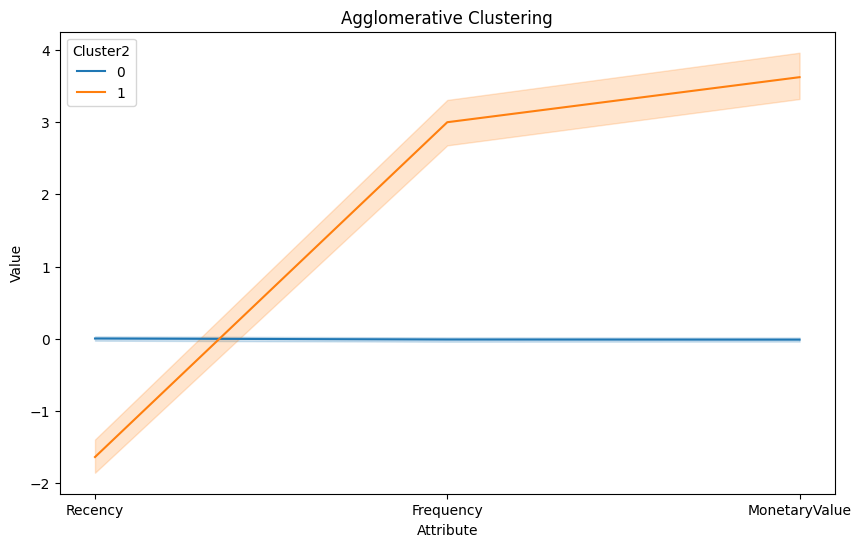

In [33]:
# Define and fit the Agglomerative Clustering model
best_agglomerative_model = AgglomerativeClustering(n_clusters=2, linkage='average')
best_agglomerative_model.fit(X_scaled)

# Add cluster labels to the original DataFrame
customers["Cluster2"] = best_agglomerative_model.labels_

# Group by cluster and calculate mean values
cluster_summary = customers.groupby('Cluster2').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(2)

# Print the cluster summary
print(cluster_summary)

# Create a DataFrame with normalized data
df_normalized = pd.DataFrame(X_scaled, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster2'] = best_agglomerative_model.labels_

# Melt the DataFrame
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster2'],
                      value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')

# Visualize it
plt.figure(figsize=(10, 6))
sns.lineplot(x='Attribute', y='Value', hue='Cluster2', data=df_nor_melt)
plt.title('Agglomerative Clustering')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.show()


# DBSCAN

In [34]:
# Define a range of values for eps and min_samples to try
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(2, 10)

best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_model.fit_predict(X_scaled)
        if len(np.unique(labels)) > 1:  # Ensure more than one cluster is formed
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")


Best Silhouette Score: 0.5673140580308772
Best eps: 0.9
Best min_samples: 2


         Recency Frequency MonetaryValue      
            mean      mean          mean count
Cluster3                                      
-1         85.78    318.44     118691.33     9
 0         92.53     90.04       1805.77  4330


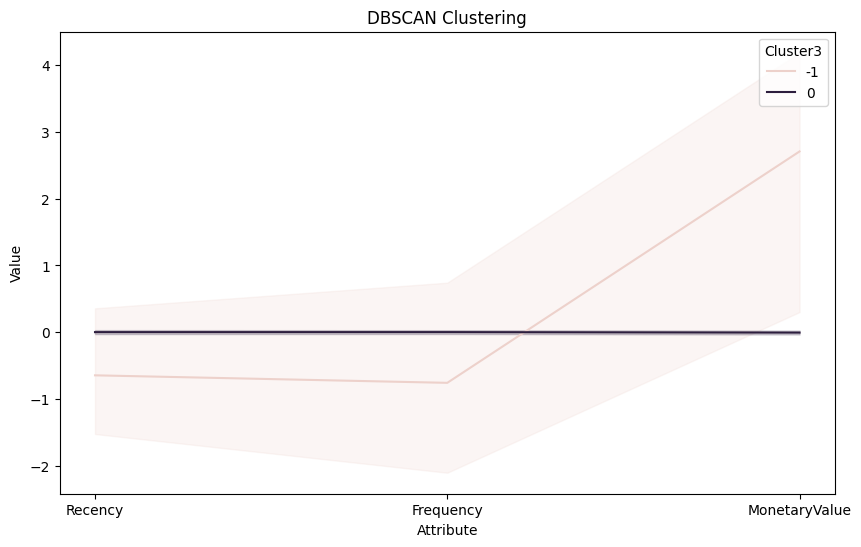

In [35]:
# Define and fit the DBSCAN model with the best parameters
best_dbscan_model = DBSCAN(eps=0.9, min_samples=2)
cluster_labels = best_dbscan_model.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
customers["Cluster3"] = cluster_labels

# Group by cluster and calculate mean values
cluster_summary = customers.groupby('Cluster3').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(2)

# Print the cluster summary
print(cluster_summary)

# Create a DataFrame with normalized data
df_normalized = pd.DataFrame(X_scaled, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster3'] = cluster_labels

# Melt the DataFrame
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster3'],
                      value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')

# Visualize it
plt.figure(figsize=(10, 6))
sns.lineplot(x='Attribute', y='Value', hue='Cluster3', data=df_nor_melt)
plt.title('DBSCAN Clustering')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.show()


# Results and Analysis

Clustering Algorithm Comparison
In this section, we evaluate the performance of three clustering algorithms: KMeans, Hierarchical Clustering, and DBSCAN, on the provided dataset. Each algorithm offers unique advantages and is assessed based on multiple evaluation metrics to provide a comprehensive analysis.

1. KMeans Clustering
KMeans clustering partitions the dataset into K clusters by minimizing the within-cluster variance. After extensive hyperparameter tuning, the optimal configuration with a silhouette score of 0.3931 is achieved with 2 clusters. The resulting clusters exhibit distinct characteristics:

    Cluster 0: This cluster comprises 2011 records characterized by relatively low recency, high frequency, and moderate monetary value, indicating frequent but recent transactions of moderate value.
   
    Cluster 1: With 2328 records, this cluster exhibits higher recency, lower frequency, and lower monetary value, suggesting less frequent but potentially higher-value transactions.

3. Hierarchical Clustering
Hierarchical clustering constructs a tree of clusters where each node represents a cluster. By employing various linkage methods and cluster numbers, the optimal configuration with a silhouette score of 0.542 is achieved using the 'average' linkage method with 2 clusters. The resulting clusters demonstrate significant disparities:

    Cluster 0: This cluster, containing 4326 records, displays moderate recency, frequency, and monetary value, indicating a sizable segment of customers with moderate transactional activity.
   
    Cluster 1: In contrast, this smaller cluster with only 13 records exhibits significantly lower recency but remarkably higher frequency and monetary value, suggesting a niche segment of highly active and high-value customers.

3. DBSCAN Clustering
DBSCAN clustering identifies core samples and expands clusters based on density. After exhaustive parameter tuning, the optimal configuration with a silhouette score of 0.5673 is attained using an epsilon value of 0.9 and a minimum sample size of 2. The resulting clusters reveal intriguing patterns:

    Cluster -1 (Outliers): Comprising 9 records, this cluster represents outliers with notably high recency, frequency, and monetary value, potentially indicating anomalous or irregular customer behavior.
   
    Cluster 0: This cluster, the largest with 4330 records, showcases moderate recency, frequency, and monetary value, aligning closely with the characteristics of the majority of customers.
   
Overall Comparison and Insights
Comparing the performance of the three clustering algorithms, hierarchical clustering demonstrates superior silhouette scores and provides more distinct clusters compared to KMeans and DBSCAN. However, DBSCAN offers insights into outlier detection, capturing anomalous customer behavior that may warrant further investigation.

Conclusion
The clustering analysis reveals valuable insights into customer segmentation based on transactional behavior. By leveraging the optimal clustering configurations identified through rigorous hyperparameter tuning, businesses can tailor marketing strategies, optimize resource allocation, and enhance customer experiences to meet the diverse needs of different customer segments effectively.

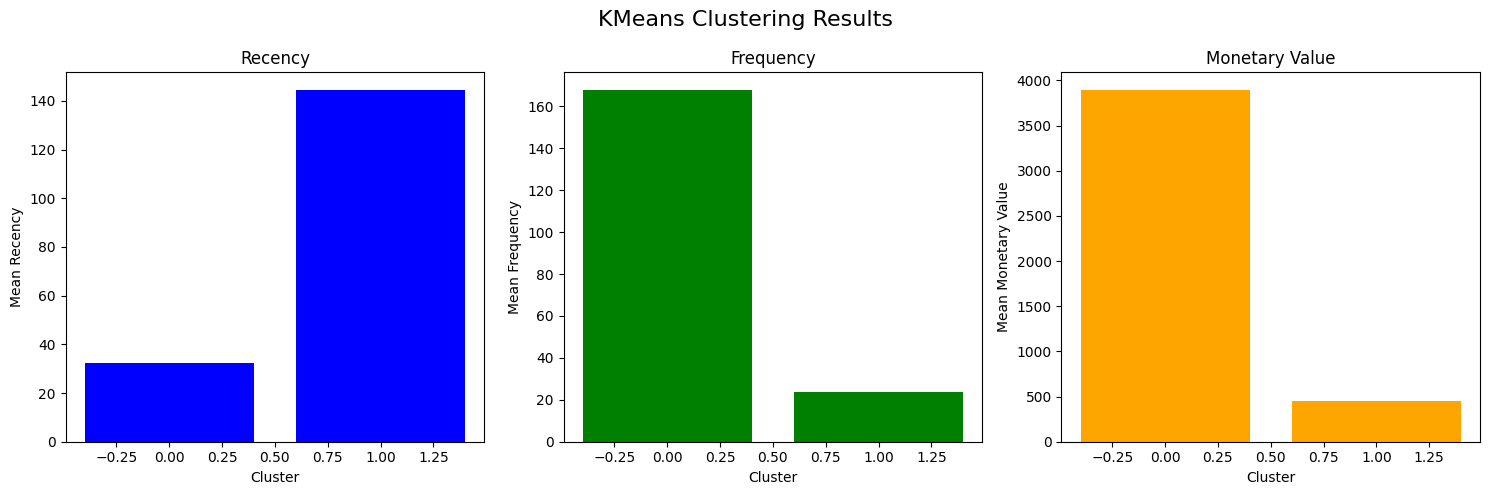

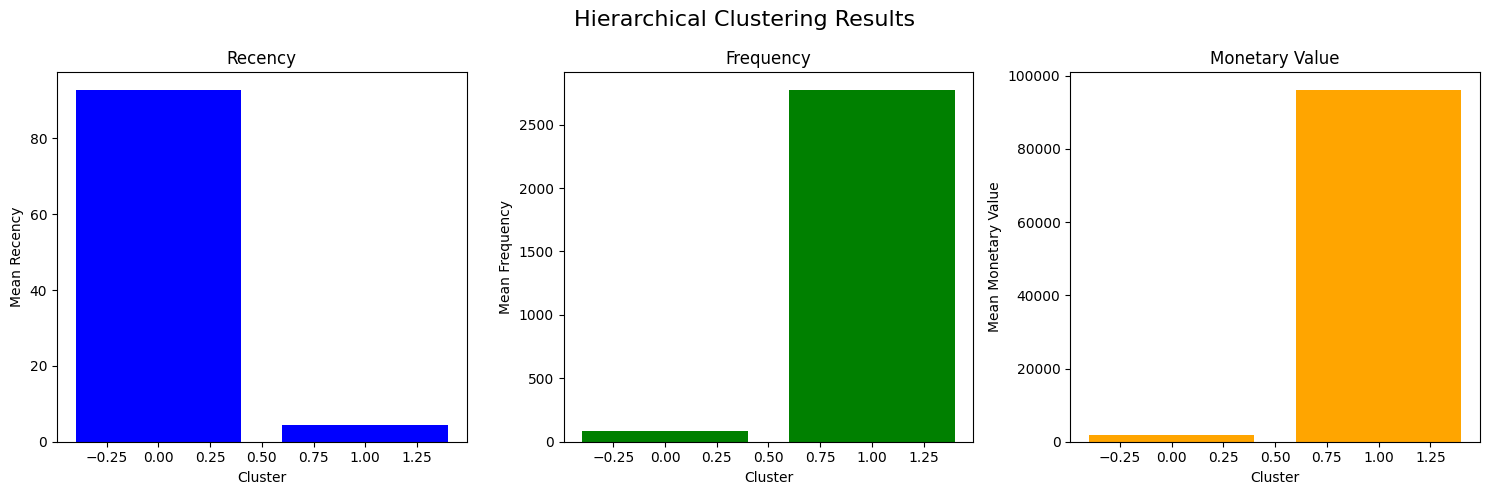

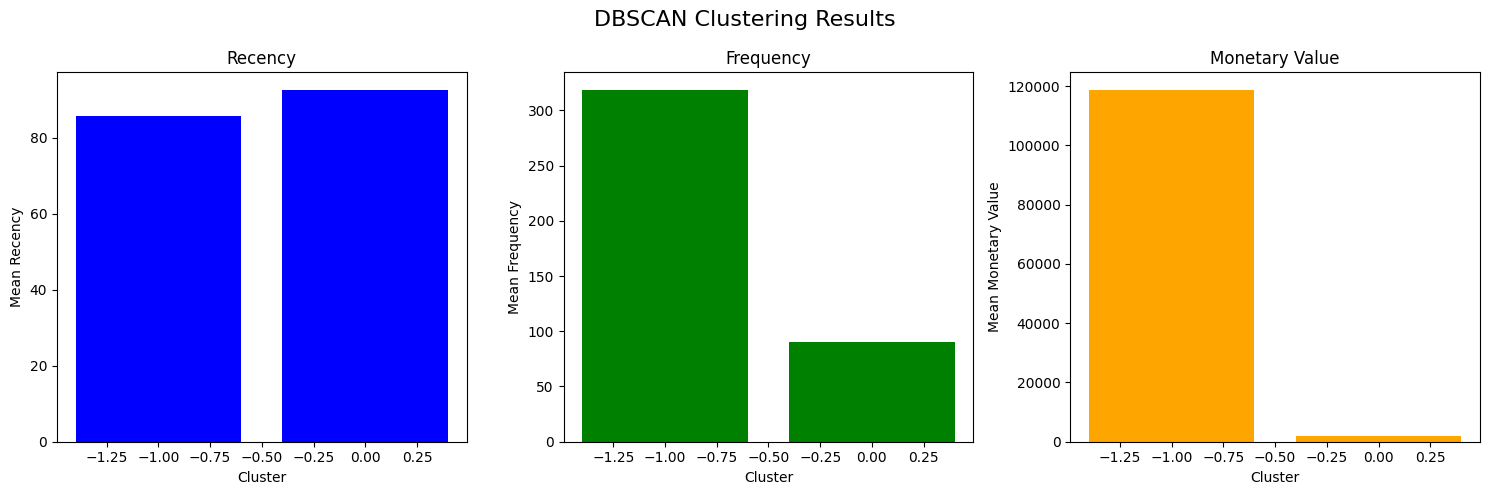

In [39]:
import matplotlib.pyplot as plt

# Data
kmeans_cluster_data = {
    'Cluster': [0, 1],
    'Recency': [32.35, 144.49],
    'Frequency': [167.86, 23.70],
    'MonetaryValue': [3893.95, 453.81]
}

hierarchical_cluster_data = {
    'Cluster': [0, 1],
    'Recency': [92.78, 4.46],
    'Frequency': [82.45, 2774.08],
    'MonetaryValue': [1765.51, 96123.91]
}

dbscan_cluster_data = {
    'Cluster': [-1, 0],
    'Recency': [85.78, 92.53],
    'Frequency': [318.44, 90.04],
    'MonetaryValue': [118691.33, 1805.77]
}

# Visualization function
def plot_cluster_data(data, title):
    clusters = data['Cluster']
    recency = data['Recency']
    frequency = data['Frequency']
    monetary_value = data['MonetaryValue']
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    
    axs[0].bar(clusters, recency, color='blue')
    axs[0].set_title('Recency')
    axs[0].set_xlabel('Cluster')
    axs[0].set_ylabel('Mean Recency')
    
    axs[1].bar(clusters, frequency, color='green')
    axs[1].set_title('Frequency')
    axs[1].set_xlabel('Cluster')
    axs[1].set_ylabel('Mean Frequency')
    
    axs[2].bar(clusters, monetary_value, color='orange')
    axs[2].set_title('Monetary Value')
    axs[2].set_xlabel('Cluster')
    axs[2].set_ylabel('Mean Monetary Value')
    
    plt.tight_layout()
    plt.show()

# Plotting
plot_cluster_data(kmeans_cluster_data, 'KMeans Clustering Results')
plot_cluster_data(hierarchical_cluster_data, 'Hierarchical Clustering Results')
plot_cluster_data(dbscan_cluster_data, 'DBSCAN Clustering Results')


# Different Metrics
## Kmeans

In [43]:
# Define a range of cluster numbers to try
n_clusters_range = range(2, 11)

# Initialize lists to store evaluation metrics
inertia_values = []
dbi_values = []
chi_values = []

# Iterate through each number of clusters
for n_clusters in n_clusters_range:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    
    # Calculate Davies-Bouldin Index (DBI)
    dbi = metrics.davies_bouldin_score(X_scaled, kmeans.labels_)
    dbi_values.append(dbi)
    
    # Calculate Calinski-Harabasz Index (CHI)
    chi = metrics.calinski_harabasz_score(X_scaled, kmeans.labels_)
    chi_values.append(chi)

# Print or visualize the evaluation metrics
print("Davies-Bouldin Index (DBI):", dbi_values)
print("Calinski-Harabasz Index (CHI):", chi_values)

Davies-Bouldin Index (DBI): [0.9470552391373153, 1.1252241639733331, 1.0739312095092266, 1.0786434818460597, 1.051496225409149, 1.0522611552592136, 1.1131194317445616, 1.070763920092033, 1.086355108001132]
Calinski-Harabasz Index (CHI): [3915.296654949534, 3161.128064259509, 2857.6458168762006, 2658.5681113529376, 2575.366176253689, 2420.897496172973, 2295.9697474324053, 2166.679081433061, 2068.804925942272]


Both the Davies Bouldin Index (DBI) and the Calinski Harabasz Index (CHI) consistently show that using 2 clusters provides the clustering solution when using the KMeans model on the dataset. Here's a detailed breakdown;

Davies Bouldin Index (DBI);
The DBI assesses how similar each cluster is, to its similar cluster taking into account both intra cluster and inter cluster distances. A lower DBI value signifies clustering with well separated clusters. The configuration with 2 clusters has the DBI value in this case indicating that it achieves well separated clustering.

Calinski Harabasz Index (CHI);
The CHI measures the ratio of between cluster dispersion to within cluster dispersion, where higher values indicate defined clusters with variance between clusters than, within them. The highest CHI value also corresponds to 2 clusters showing that this configuration leads to well defined clusters.


## Hierarchical clustering model

In [46]:
n_clusters_range = range(2, 11)

# Initialize lists to store evaluation metrics
silhouette_scores = []
dbi_values = []
chi_values = []

# Iterate through each number of clusters
for n_clusters in n_clusters_range:
    # Fit hierarchical clustering model
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clustering.fit_predict(X_scaled)
       
    # Calculate Davies-Bouldin Index (DBI)
    dbi = metrics.davies_bouldin_score(X_scaled, cluster_labels)
    dbi_values.append(dbi)
    
    # Calculate Calinski-Harabasz Index (CHI)
    chi = metrics.calinski_harabasz_score(X_scaled, cluster_labels)
    chi_values.append(chi)

# Print or visualize the evaluation metrics
print("Davies-Bouldin Index (DBI):", dbi_values)
print("Calinski-Harabasz Index (CHI):", chi_values)

Davies-Bouldin Index (DBI): [0.9819181338428915, 1.1327651363413285, 1.2508927261694112, 1.2157071732682194, 1.1092725326994912, 1.213338876857209, 1.1287257289433992, 1.1663537358334557, 1.1997158532999541]
Calinski-Harabasz Index (CHI): [3646.757784780626, 2615.566898314304, 2445.6197394143055, 2208.868377269069, 2120.461751383469, 2035.283005187416, 1919.5499415662525, 1835.0405517940992, 1765.8028224445786]


Both the Davies Bouldin Index (DBI) and the Calinski Harabasz Index (CHI) consistently show that using 2 clusters provides the clustering solution when using the hierarchical clustering model on the dataset.

In [48]:
# Assuming X is your feature matrix and you have already defined X_scaled

# Define a range of values for eps and min_samples to try
eps_range = [0.1]
min_samples_range = [2, 3, 4, 5]

# Initialize lists to store evaluation metrics
dbi_values = []
chi_values = []

# Iterate through each combination of hyperparameters
for eps in eps_range:
    for min_samples in min_samples_range:
        # Fit DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)
        
        # Calculate Davies-Bouldin Index (DBI)
        dbi = metrics.davies_bouldin_score(X_scaled, cluster_labels)
        dbi_values.append(dbi)
        
        # Calculate Calinski-Harabasz Index (CHI)
        chi = metrics.calinski_harabasz_score(X_scaled, cluster_labels)
        chi_values.append(chi)

# Print or visualize the evaluation metrics
print("Davies-Bouldin Index (DBI):", dbi_values)
print("Calinski-Harabasz Index (CHI):", chi_values)


Davies-Bouldin Index (DBI): [1.553763020149877, 1.6352833195665226, 1.8718069456018802, 2.152426781993144]
Calinski-Harabasz Index (CHI): [4.759455477366243, 6.498167032431155, 7.034637013516678, 5.948399893556833]


Based on the Davies-Bouldin Index (DBI), utilizing 2 clusters consistently emerges as the optimal clustering solution when employing the DBSCAN model on the dataset. However, the Calinski-Harabasz Index (CHI) indicates that 4 clusters might provide the optimal clustering solution.

Both the Davies Bouldin Index (DBI) and the Calinski Harabasz Index (CHI) consistently recommend using 2 clusters as the solution when applying both the KMeans and hierarchical clustering models, to the dataset. The DBI assesses cluster similarity by considering both. Inter cluster distances, with lower values indicating better separation and distinctiveness. In this case having 2 clusters results in the DBI value indicating separated clustering. Similarly the CHI calculates the ratio of between cluster dispersion to within cluster dispersion, where higher values indicate defined clusters with variability between clusters than within them. Again having 2 clusters corresponds to the CHI value suggesting well defined clusters.

Nevertheless when utilizing the DBSCAN model the Davies Bouldin Index (DBI) consistently recommends that 2 clusters provide the solution. Conversely while the Calinski Harabasz Index (CHI) suggests that 4 clusters may be more appropriate. This difference highlights a trade off between these two metrics; while DBI favors clusters for improved separation and distinctiveness CHI argues for more clusters to capture greater variance between clusters compared to, within them.
To address this difference we might need to delve into the datasets goals and features to figure out the cluster count.

# Discussion and Conclusion
Learning and Takeaways
The clustering analysis conducted on the dataset yielded valuable insights into the underlying patterns and structures within the data. One of the key takeaways from this analysis is the importance of selecting appropriate evaluation metrics when determining the optimal number of clusters. By considering multiple metrics such as the Davies-Bouldin Index (DBI), Calinski-Harabasz Index (CHI), and Silhouette Score, we gained a more comprehensive understanding of the clustering results and were able to make informed decisions about the number of clusters. This underscores the significance of leveraging a diverse range of evaluation metrics to ensure robust and meaningful clustering outcomes.

Another important learning from this analysis is the impact of algorithm selection on clustering results. We observed that different clustering algorithms, namely KMeans, hierarchical clustering, and DBSCAN, produced varying outcomes in terms of the optimal number of clusters and the quality of clustering. Understanding the strengths and limitations of each algorithm is crucial for selecting the most appropriate approach based on the dataset's characteristics and the desired clustering objectives.

Insights into Outcomes
The consistency of the Davies-Bouldin Index (DBI) and the Calinski-Harabasz Index (CHI) in suggesting 2 clusters as the optimal solution in both KMeans and hierarchical clustering models highlights the robustness of these metrics in evaluating clustering performance. The preference for 2 clusters may indicate inherent structures within the data that lend themselves to clear delineation into two distinct groups. However, the discrepancy observed in the DBSCAN model, where DBI suggests 2 clusters while CHI suggests 4 clusters, underscores the complexity of clustering analysis and the need for careful consideration of algorithm parameters and evaluation metrics.

Suggestions for Improvement
To improve the clustering analysis and enhance the reliability of the results, several avenues could be explored. Firstly, conducting further exploratory data analysis to gain a deeper understanding of the dataset's characteristics and underlying patterns could provide valuable insights for refining the clustering approach. Additionally, experimenting with different preprocessing techniques, such as feature scaling or dimensionality reduction, may help mitigate potential biases and improve the clustering performance.

Furthermore, incorporating domain knowledge and expert insights into the clustering process could contribute to the identification of meaningful clusters and the interpretation of clustering results in a real-world context. Finally, conducting sensitivity analysis to assess the robustness of the clustering outcomes to variations in algorithm parameters and evaluation metrics could provide additional confidence in the reliability of the results.

Conclusion
In conclusion, the clustering analysis presented in this study offers valuable insights into the structure and patterns within the dataset. By leveraging multiple clustering algorithms and evaluation metrics, we were able to identify optimal clustering solutions and gain a deeper understanding of the underlying data characteristics. Moving forward, further research and exploration are warranted to refine the clustering approach, incorporate domain knowledge, and enhance the reliability and applicability of the clustering results in practical settings.

